## 데이터 준비

In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline


In [2]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
elif platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print("Error...")

# 영화 분석 모델

In [3]:
origin = pd.read_excel('data/영화정보 삭제1.xlsx')

In [4]:
movie = pd.read_csv('data/movie2.csv', encoding='CP949')

In [5]:
origin

,영화명,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
0,명량,136000000000,17613682,한국,씨제이이앤엠(주),한국,김한민,사극,액션,NaN,NaN,NaN,NaN,NaN
1,베테랑,105000000000,13414009,한국,씨제이이앤엠(주),한국,류승완,액션,드라마,NaN,NaN,NaN,NaN,NaN
2,도둑들,93664808500,12983178,한국,(주)쇼박스,"한국,홍콩",최동훈,액션,범죄,NaN,NaN,NaN,NaN,NaN
3,7번방의 선물,91431914670,12811206,한국,(주)넥스트엔터테인먼트월드(NEW),한국,이환경,코미디,드라마,NaN,NaN,NaN,NaN,NaN
4,암살,98463132781,12705700,한국,(주)쇼박스,한국,최동훈,액션,드라마,NaN,NaN,NaN,NaN,NaN
5,"광해, 왕이 된 남자",88899448769,12319390,한국,씨제이이앤엠(주),한국,추창민,사극,드라마,NaN,NaN,NaN,NaN,NaN
6,신과함께-인과 연,103000000000,12274163,한국,롯데컬처웍스(주)롯데엔터테인먼트,한국,김용화,판타지,드라마,NaN,NaN,NaN,NaN,NaN
7,택시운전사,95853645649,12186327,한국,(주)쇼박스,한국,장훈,드라마,NaN,NaN,NaN,NaN,NaN,NaN
8,부산행,93178283048,11565479,한국,(주)넥스트엔터테인먼트월드(NEW),한국,연상호,액션,스릴러,NaN,NaN,NaN,NaN,NaN
9,해운대,81025004000,11324433,한국,씨제이엔터테인먼트,한국,윤제균,액션,드라마,어드벤처,NaN,NaN,NaN,NaN


In [6]:
movie

,영화명,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
0,명량,1.360000e+11,17613682.0,3,3,한국,2.4,사극,액션,NaN,NaN,NaN,NaN,NaN
1,베테랑,1.050000e+11,13414009.0,3,3,한국,2.8,액션,드라마,NaN,NaN,NaN,NaN,NaN
2,도둑들,9.366481e+10,12983178.0,3,2.9,"한국,홍콩",3,액션,범죄,NaN,NaN,NaN,NaN,NaN
3,7번방의 선물,9.143191e+10,12811206.0,3,2.8,한국,0.8,코미디,드라마,NaN,NaN,NaN,NaN,NaN
4,암살,9.846313e+10,12705700.0,3,2.9,한국,3,액션,드라마,NaN,NaN,NaN,NaN,NaN
5,"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,한국,1.3,사극,드라마,NaN,NaN,NaN,NaN,NaN
6,신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,한국,2.7,판타지,드라마,NaN,NaN,NaN,NaN,NaN
7,택시운전사,9.585365e+10,12186327.0,3,2.9,한국,2.1,드라마,NaN,NaN,NaN,NaN,NaN,NaN
8,부산행,9.317828e+10,11565479.0,3,2.8,한국,0.4,액션,스릴러,NaN,NaN,NaN,NaN,NaN
9,해운대,8.102500e+10,11324433.0,3,2.6,한국,2.2,액션,드라마,어드벤처,NaN,NaN,NaN,NaN


In [7]:
movie = movie.fillna(0)

# 대표국적 
## 한국 = 3 미국 -=2 일본 1 그외 0 으로 점수화

# 배급사 -
## 가장 높은 순위의 영화 보유가 많은 순 (전체 배급한 영화 중 잘 나간 영화가 많은 배급사에 고급 부여)

# 감독 - 감독의 모든 영화의 관객수의 합을 기준으로 3~0 사이의 값을 부여.
## 30등 이하로는 미세한 차이이므로 0 부여.

In [8]:
movie

,영화명,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
0,명량,1.360000e+11,17613682.0,3,3,한국,2.4,사극,액션,0,0,0,0,0
1,베테랑,1.050000e+11,13414009.0,3,3,한국,2.8,액션,드라마,0,0,0,0,0
2,도둑들,9.366481e+10,12983178.0,3,2.9,"한국,홍콩",3,액션,범죄,0,0,0,0,0
3,7번방의 선물,9.143191e+10,12811206.0,3,2.8,한국,0.8,코미디,드라마,0,0,0,0,0
4,암살,9.846313e+10,12705700.0,3,2.9,한국,3,액션,드라마,0,0,0,0,0
5,"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,한국,1.3,사극,드라마,0,0,0,0,0
6,신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,한국,2.7,판타지,드라마,0,0,0,0,0
7,택시운전사,9.585365e+10,12186327.0,3,2.9,한국,2.1,드라마,0,0,0,0,0,0
8,부산행,9.317828e+10,11565479.0,3,2.8,한국,0.4,액션,스릴러,0,0,0,0,0
9,해운대,8.102500e+10,11324433.0,3,2.6,한국,2.2,액션,드라마,어드벤처,0,0,0,0


제작국가, 장르 1 빼고 다 날리자

In [9]:
movie = movie.set_index('영화명')
movie


,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
영화명,,,,,,,,,,,,,
명량,1.360000e+11,17613682.0,3,3,한국,2.4,사극,액션,0,0,0,0,0
베테랑,1.050000e+11,13414009.0,3,3,한국,2.8,액션,드라마,0,0,0,0,0
도둑들,9.366481e+10,12983178.0,3,2.9,"한국,홍콩",3,액션,범죄,0,0,0,0,0
7번방의 선물,9.143191e+10,12811206.0,3,2.8,한국,0.8,코미디,드라마,0,0,0,0,0
암살,9.846313e+10,12705700.0,3,2.9,한국,3,액션,드라마,0,0,0,0,0
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,한국,1.3,사극,드라마,0,0,0,0,0
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,한국,2.7,판타지,드라마,0,0,0,0,0
택시운전사,9.585365e+10,12186327.0,3,2.9,한국,2.1,드라마,0,0,0,0,0,0
부산행,9.317828e+10,11565479.0,3,2.8,한국,0.4,액션,스릴러,0,0,0,0,0


In [10]:
movie.columns

Index(['매출액', '관객수', '대표국적', '배급사', '제작국가', '감독', '장르1', '장르2', '장르3', '장르4',
       '장르5', '장르6', '장르7'],
      dtype='object')

In [11]:
list=['매출액', '관객수', '대표국적','배급사','감독', '장르1']

In [12]:
movie2 =movie[list]

In [13]:
movie2 

,매출액,관객수,대표국적,배급사,감독,장르1
영화명,,,,,,
명량,1.360000e+11,17613682.0,3,3,2.4,사극
베테랑,1.050000e+11,13414009.0,3,3,2.8,액션
도둑들,9.366481e+10,12983178.0,3,2.9,3,액션
7번방의 선물,9.143191e+10,12811206.0,3,2.8,0.8,코미디
암살,9.846313e+10,12705700.0,3,2.9,3,액션
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,1.3,사극
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,2.7,판타지
택시운전사,9.585365e+10,12186327.0,3,2.9,2.1,드라마
부산행,9.317828e+10,11565479.0,3,2.8,0.4,액션


In [14]:
movie2['감독']

영화명
명량                          2.4
베테랑                         2.8
도둑들                           3
7번방의 선물                     0.8
암살                            3
광해, 왕이 된 남자                 1.3
신과함께-인과 연                   2.7
택시운전사                       2.1
부산행                         0.4
해운대                         2.2
어벤져스: 인피니티 워                1.8
괴물                          2.3
어벤져스: 에이지 오브 울트론            1.2
겨울왕국                크리스 벅,제니퍼 리
인터스텔라                       2.6
왕의 남자                       2.5
검사외전                        이일형
설국열차                        2.3
관상                          한재림
아이언맨 3                    쉐인 블랙
국제시장                        2.2
캡틴 아메리카: 시빌 워               1.8
해적: 바다로 간 산적                1.7
수상한 그녀                      1.4
신과함께-죄와 벌                   2.7
아바타                     제임스 카메론
국가대표                        2.7
디워                          심형래
공조                          1.9
트랜스포머 3                     2.9
                       ...     
50가지

In [15]:
d=[]
for dic in movie2["감독"]:
    try:
        a= float(dic)
    except ValueError:
        dic=0.1
        a =float(dic)
    d.append(a)   

In [16]:
d

[2.4,
 2.8,
 3.0,
 0.8,
 3.0,
 1.3,
 2.7,
 2.1,
 0.4,
 2.2,
 1.8,
 2.3,
 1.2,
 0.1,
 2.6,
 2.5,
 0.1,
 2.3,
 0.1,
 0.1,
 2.2,
 1.8,
 1.7,
 1.4,
 2.7,
 0.1,
 2.7,
 0.1,
 1.9,
 2.9,
 0.1,
 2.4,
 2.9,
 2.9,
 1.1,
 0.1,
 2.8,
 1.9,
 1.2,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.5,
 0.1,
 0.0,
 0.1,
 0.1,
 2.8,
 0.6,
 0.1,
 2.6,
 2.5,
 0.1,
 0.7,
 0.6,
 0.1,
 0.0,
 2.6,
 0.1,
 0.0,
 3.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 2.1,
 0.1,
 0.0,
 0.1,
 0.0,
 0.1,
 2.9,
 0.1,
 0.0,
 0.1,
 0.0,
 1.7,
 0.1,
 0.1,
 0.1,
 0.1,
 0.5,
 0.1,
 0.9,
 0.1,
 0.7,
 0.1,
 0.1,
 0.3,
 0.1,
 0.1,
 0.1,
 0.9,
 0.9,
 0.1,
 0.1,
 0.1,
 1.4,
 2.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 2.0,
 1.1,
 1.0,
 0.1,
 1.6,
 0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.1,
 0.1,
 2.6,
 1.7,
 0.1,
 0.1,
 0.1,
 1.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 1.4,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 2.0,
 0.1,
 1.0,
 0.1,
 0.1,
 3.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 1.9

In [17]:
df = pd.DataFrame(d)

df=df.rename(columns = {0:'감독'})


In [18]:
d1=[]
for dic in movie2["배급사"]:
    print(dic)
    try:
        a= float(dic)
    except ValueError:
        dic=0.1
        a =float(dic)
    d1.append(a)   

3
3
2.9
2.8
2.9
3
2.7
2.9
2.8
2.6
2.5
2.9
2.5
2.3
2.2
2.1
2.9
3
2.9
2.3
3
2.5
2
3
2
0.4
2.9
2.9
3
3
2.2
2
2.6
2.6
3
1.8
3
2.9
1.7
2.9
3
2.9
0
2.9
1.6
1.5
0
2.6
3
3
2.7
2.9
2.2
2.9
2.6
1.6
2
2.8
0
2.2
2.8
0
2.6
1.4
2
2.8
0
2
2
1.4
2.8
2.5
2.5
3
2.8
2.9
2.5
0
2.8
0
3
3
2
0
2.5
0
3
1
2.6
2.8
3
2.9
3
3
2.5
1.6
3
2.8
1.6
2.5
1.7
2.9
2.9
2.9
2.5
2.2
2.8
3
2.2
2.6
2.7
2.8
1.7
1.4
2.9
3
2
2.6
2.2
2
1.6
2.8
2.6,2.1
2.6
3
2.9
2.3
2.6
2
1.4
주식회사 해리슨앤컴퍼니,2.2
3
2
(주)싸이더스
2.9
2,(주)싸이더스
2.8
1.6
3
2.3
브에나비스타인터내셔널코리아
2.9
1.8
2.9
0
2
3
CGV아트하우스,(주)대명문화공장
2.2
2.9
1.6
2.6
2.2
1.4
1.6
1.4
1.1
2.6
2.2
(주)와우픽쳐스
0
0
1.7
2.9
2.5
2.8
2.9
3
0
판씨네마(주)
3
1.7
2.6
2.6
2
1.4
1.6
2.2
2.9
2,(주)리틀빅픽쳐스
1.4
2
2.9
2.2
1.4
주식회사 해리슨앤컴퍼니,2.2
2.2
0
1.3
3
3
2.1
1.7
3
2.6
아이러브시네마
2
2.5
2.8
2.3
2.6
2.5
2.9
소니픽쳐스릴리징코리아
2.6
2
3
2.6
3
2.6
2.6
2
2.6
1.3
2.2
1.8
2.9
(주)인벤트스톤,영화사청어람(주)
1.6
㈜인디스토리
2.9
1.7
2.9
1.4
0
1.4
3
2.5
2.6
1.1
1.6
2.5
2.5
2.2
3
1.6
1.6
2.5
2.9
2.6
1.7
2
1.6
2
0
2.6
2.9
2
2.9
2.6
2.9
2.8
1
2.2
2.6
2
0
3
1.4
2
1.4
2

0
(주)팝엔터테인먼트
(주)영화제작전원사 ,(주)영화사 조제
씨네그루(주)다우기술
(주)마인스 엔터테인먼트
(주)스폰지이엔티
씨네그루(주)다우기술
1.4
1
(주)미디어캐슬
(주)프라임엔터테인먼트
0
씨너스엔터테인먼트(주)
(주)영화사 빅
1.4
(주)프라임엔터테인먼트
(주)엣나인필름
(주)팝엔터테인먼트
(주)이수C&E
2
0
0
(주)스톰픽쳐스코리아
2.1
(주)에스비에스콘텐츠허브
씨너스엔터테인먼트(주)
0
(주)박수엔터테인먼트
0
0
3
(주)화앤담이엔티
(주)박수엔터테인먼트
(주)스톰픽쳐스코리아
(주)스톰픽쳐스코리아,(주)디스테이션
(주)인벤트스톤
(주)디스테이션,㈜메가박스
0
1.7
(주)엣나인필름
(주)스폰지이엔티
그린나래미디어(주)
㈜인디스토리
(주)박수엔터테인먼트,㈜코리아스크린
주식회사 디에스이이디
(주)디스테이션
필라멘트픽쳐스
2
(주)삼지애니메이션
예지림엔터테인먼트
(주)이수C&E
2
이미지팩토리
(주)영화사 진진
1.8
0
2.8
(주)명필름
그린나래미디어(주)
(주)엣나인필름
(주)영화사 빅
(주)영화사 빅
(주)영화제작전원사 ,(주)영화사 조제
(주)드림팩트엔터테인먼트,(주)미로스페이스,씨너스엔터테인먼트(주),(주)미로비젼,(주)박수엔터테인먼트
2,케이비에스미디어(주)
(주)엣나인필름,씨너스엔터테인먼트(주)
(주)팝엔터테인먼트
스폰지
1
1.6
(주)에스와이코마드,글뫼 주식회사
2.8
2
판씨네마(주)
1.4
CGV아트하우스
0
씨네그루(주)키다리이엔티
2
씨제이 씨지브이(CJ CGV)(주)
(주)삼지애니메이션
(주)영화사 진진,(주)영화사 조제
0
0
1.4
(주)엣나인필름
CGV아트하우스
찬란
(주)나이너스엔터테인먼트
소니픽쳐스릴리징코리아
이달투
2.8
(주)엣나인필름,(주)스폰지이엔티
(주)영화사 진진,아트플러스시네마네트워크
3
(주)영화사 진진
예지림엔터테인먼트
(주)영화사오원,(주)브리즈픽처스
판씨네마(주)
2.1
(주)프레인글로벌
1.4
2.3
판씨네마(주)
(주)이모션픽처스,THE 픽쳐스
(주)디스테이션,(주)동숭아트센터
1

찬란
(주)마노엔터테인먼트
와이드 릴리즈(주)
(주)영화사 조제
(주)박수엔터테인먼트
0
(주)라이크 콘텐츠
2
(주)드림팩트엔터테인먼트
0
주식회사 씨네룩스
1.7
0
(주)박수엔터테인먼트
주식회사 마운틴픽쳐스
프리비젼엔터테인먼트
주식회사 씨네룩스
(주)영화사 조제
(주)디스테이션
(주)영화사 진진
(주)디스테이션
브릿지웍스 엔터테인먼트(주)
1.7
와이드 릴리즈(주)
(주)스폰지이엔티
(주)박수엔터테인먼트
0
(주)키노아이디엠씨
(주)영화사 진진
0
(주)스폰지이엔티
예지림엔터테인먼트
CGV아트하우스
스폰지
0
2.6
주식회사 씨네룩스
익스트림 필름
0
0
1.1
주식회사 씨네룩스
오드
와이드 릴리즈(주)
찬란
0
(주)에스와이코마드
그린나래미디어(주)
0
(주)삼지애니메이션
(주)미디어데이
(주)팝엔터테인먼트
1.4
(주)서태지컴퍼니
KT&G 상상마당 영화사업팀 컴퍼니에스에스(주)
(주)스마일이엔티
영화사청어람(주),아트플러스시네마네트워크
찬란
(주)미디어데이
씨제이 씨지브이(CJ CGV)(주)
(주)에스와이코마드
(주)키노아이디엠씨
(주)영화사 빅
(주)팝엔터테인먼트
0
판씨네마(주)
주식회사 마운틴픽쳐스
(주)콘텐츠판다
0
주식회사 마운틴픽쳐스
2.6
(주)인디플러그
0
(주)에스와이코마드
그린나래미디어(주)
0
0
(주)유레카픽쳐스
0
0
1.6
와이드 릴리즈(주)
1.7
(주)시네마달
㈜영화사 백두대간
주식회사 쇼미미디어앤트레이딩
찬란
(주)스폰지이엔티
와이드 릴리즈(주)
씨제이 씨지브이(CJ CGV)(주)
0
1.7
(주)팝파트너스
1.7
(주)케이알씨지
0
주식회사 씨네룩스
(주)애니플러스
스폰지
(주)팝파트너스
프리비젼엔터테인먼트
(주)미디어데이
(주)드림팩트엔터테인먼트
(주)디스테이션
에스디시코리아 주식회사
서울엠피필름(주)
1.7
0
(주)미디어데이
와이드 릴리즈(주)
(주)시네마달
스크린조이
3
(주)유레카픽쳐스
(주)엣나인필름
(주)미로비젼
(주)동숭아트센터
㈜인디스토리
(주)케이알씨지
(유)영화사 화수분,(주)아펙스 엔터테인먼트
(주

스크린조이
제인앤유
0
(주)소나무픽쳐스
0
0
0
(주)소나무픽쳐스
오드
(주)에스비에스콘텐츠허브
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)소나무픽쳐스
0
노바엔터테인먼트
(주)소나무픽쳐스
서울애니메이션센터
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)미디어데이
(주)더블앤조이픽쳐스
0
주식회사 마운틴픽쳐스
㈜인디스토리
(주)유레카픽쳐스
골든타이드픽처스(주)
(주)미디어데이
(주)시네마엔터,(주)모멘텀엔터테인먼트
와이드 릴리즈(주)
0
0
㈜씨네콰논코리아
파이오니아21
스크린조이
0
0
영화진흥위원회,아트플러스시네마네트워크
제인앤유
(주)디스테이션
(주)소나무픽쳐스
(주)미디어캐슬
0
0
0
골든타이드픽처스(주)
0
0
소니픽쳐스릴리징코리아
(주)미디어데이
0
(주)영화사구안,롯데쇼핑㈜롯데시네마
0
(주)엣나인필름
1.4
서울독립영화제
(주)영화사 그램
(주)스마일이엔티
0
0
어뮤즈
0
(주)미디어데이
주식회사 마운틴픽쳐스
0
(주)팝엔터테인먼트
위드시네마
0
(주)팝엔터테인먼트
0
0
0
0
0
0
(주)미디어데이
(유)조이앤컨텐츠그룹
(주)팝엔터테인먼트
(주)미디어데이
(유)영화사 화수분
0
(주)케이알씨지
0
0
0
(주)이수C&E
0
0
0
(주)드림팩트엔터테인먼트
0
(주)미디어데이
0
와이드 릴리즈(주)
와이드 릴리즈(주)
주식회사 마운틴픽쳐스
주식회사 마운틴픽쳐스
0
프리비젼엔터테인먼트
㈜세종커뮤니케이션스
0
(주)미디어이야기
주식회사 마운틴픽쳐스
0
2,(주)퍼스트런
고구마콘텐츠허브(주)
(유)영화사 화수분
(주)케이알씨지
0
0
와이드 릴리즈(주)
0
(주)미디어데이
0
(주)스폰지이엔티
(주)소나무픽쳐스
(주)소나무픽쳐스
어뮤즈
(주)미디어데이
3
(주)소나무픽쳐스
(주)베드픽쳐스
예지림엔터테인먼트
(주)소나무픽쳐스
(주)미디어데이
(유)조이앤컨텐츠그룹
0
0
0
(주)미디어데이
(주)박수엔터테인먼트
(주)소나무픽쳐스
(주)랠리버튼
(주)케이알씨지
(주)퍼스트런
(주)미디어데이
(주)미디어

0
0
(주)시네마달
0
(주)유레카픽쳐스
2.6
0
씨제이 씨지브이(CJ CGV)(주)
0
0
주식회사 마운틴픽쳐스
0
(주)케빈앤컴퍼니
0
주식회사 풍경소리
0
0
주식회사 풍경소리
0
0
(주)더블앤조이픽쳐스
(주)케빈앤컴퍼니
(주)소나무픽쳐스
0
(주)스마일이엔티
0
어뮤즈
0
예지림엔터테인먼트
(주)소나무픽쳐스
0
0
(주)인스터피씨엠
0
0
0
(주)씨에이씨엔터테인먼트
0
0
(주)인스터피씨엠
0
0
(주)제이에이와이이엔터테인먼트
0
0
0
0
0
(주)팝엔터테인먼트
0
0
0
0
0
0
스크린조이
서울독립영화제
0
글뫼 주식회사,(주)퍼스트런
에이라인
0
노바엔터테인먼트
골든타이드픽처스(주)
0
0
0
골든타이드픽처스(주)
0
(주)소나무픽쳐스
주식회사 마운틴픽쳐스
(주)영화사히트
(주)스폰지이엔티
골든타이드픽처스(주)
(유)영화사 화수분
마법사필름
0
0
0
(주)더블앤조이픽쳐스
0
(주)팝엔터테인먼트
(주)수키픽쳐스
고구마콘텐츠허브(주)
(주)인스터피씨엠
(주)피터팬픽쳐스
0
0
0
KT&G 상상마당 영화사업팀 컴퍼니에스에스(주)
0
0
(주)영화사 진진,(주)스폰지이엔티
0
(주)머스트씨무비릴리징컴퍼니
(주)얼리버드픽쳐스
스폰지
TCO(주)더콘텐츠온
0
0
0
2.6
0
(주)이모션픽처스
0
0
0
0
노바엔터테인먼트
어뮤즈
(주)화인픽쳐스
0
(주)인디플러그
스크린조이
(주)이모션픽처스
(주)올댓시네마 플러스
스폰지
0
0
㈜인디스토리
0
(주)쓰리캣프로덕션
0
㈜인디스토리
0
0
㈜인디스토리,아트플러스시네마네트워크
0
0
0
0
(주)두엔터테인먼트
0
CGV아트하우스
(주)트리필름
㈜T-JOY
골든타이드픽처스(주),(주)옐로우필름
썬택엔터테인먼트 주식회사
0
0
(주)씨네마드마농
에이원엔터테인먼트
(주)로이테미디어
(주)드림웨스트픽쳐스
(주)인스터피씨엠
(주)미로비젼
0
0
M&M 인터내셔널
0
0
0
0
노가리필름,(주)인디플러그
(주)웃기씨네
0
(주)우성엔터테인먼트
에이라인
에이원엔터테인먼트
(주)비엠컬쳐스
그리고필름앤드라마
0
㈜인

0
0
0
0
0
(주)영화사폴
0
0
0
0
0
0
0
0
(주)컴퍼니엘
0
㈜코리아스크린
㈜코리아스크린
0
0
스마일컨텐츠
0
주식회사 씨엠닉스
0
0
0
0
0
0
0
0
0
0
0
0
비에이치제이 시네마
0
0
0
0
0
0
0
0
(주)씨맥스커뮤니케이션즈
0
0
0
0
0
0
0
0
0
0
(주)액티버스엔터테인먼트
0
0
0
0
0
(주)드림팩트엔터테인먼트
(주)소나무픽쳐스
0
0
(주)머스트씨무비릴리징컴퍼니
0
(주)마노엔터테인먼트
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
CNS엔터테인먼트
0
0
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)콘텐츠윙
0
0
미디어소프트
(주)마노엔터테인먼트
0
0
0
0
0
0
0
0
주식회사 마운틴픽쳐스
(주)키노아이디엠씨
(주)소나무픽쳐스
페어팍스인터내셔날(주)
0
0
0
0
(주)케이알씨지
0
0
0
0
0
0
(주)소나무픽쳐스
라인트리엔터테인먼트
0
(주)영화사가을
0
0
0
0
0
0
0
0
(주)싸이더스
0
골든타이드픽처스(주)
0
0
0
노바엔터테인먼트
0
0
0
주식회사 마운틴픽쳐스
(주)CM엔터테인먼트
(주)나우콘텐츠
0
예지림엔터테인먼트
(주)나우콘텐츠
0
(주)나우콘텐츠
0
0
0
(주)스넵쏘울
㈜크래커픽쳐스
0
0
0
0
0
0
0
0
0
(주)소나무픽쳐스
0
0
0
(유)조이앤컨텐츠그룹
0
(주)케이앤엔터테인먼트
0
0
(주)스넵쏘울
(주)나우콘텐츠
0
0
(주)스넵쏘울
0
예지림엔터테인먼트
(주)케이알씨지
(주)케이알씨지
0
노바엔터테인먼트
0
(주)나우콘텐츠
0
(주)스넵쏘울
0
(주)스넵쏘울
(주)나우콘텐츠
(주)나우콘텐츠
0
0
(주)스넵쏘울
(주)나우콘텐츠
0
오퍼스픽쳐스
(유)조이앤컨텐츠그룹
0
(주)스넵쏘울
(주)미디어데이
(주)나우콘텐츠
(주)스넵쏘울
(주)케이알씨지
0
(주)케이알씨지
(주)스넵쏘울
0
(주)케이알씨지
0
(주)스넵쏘울
0
0
0
0

(주)도키엔터테인먼트
(주)액티버스엔터테인먼트
(주)테라맥스엔터테인먼트
(주)케이알씨지
(주)콘텐츠윙
(주)에스와이미디어
(주)도키엔터테인먼트
(주)영진크리에이티브
골든타이드픽처스(주)
(주)에스와이미디어
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)도키엔터테인먼트
(주)영진크리에이티브
(주)영진크리에이티브
(주)소나무픽쳐스
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(유)영화사 화수분
(주)영진크리에이티브
(주)영진크리에이티브
(주)소나무픽쳐스
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
미디어소프트
(주)소나무픽쳐스
(주)영진크리에이티브
(주)소나무픽쳐스
(주)영진크리에이티브
(주)소나무픽쳐스
주식회사 마운틴픽쳐스
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
미디어소프트
(주)영진크리에이티브
스마일컨텐츠
(주)영진크리에이티브
에이원 미디어
(주)영진크리에이티브
(주)영진크리에이티브
(유)영화사 화수분
(유)영화사 화수분
(유)영화사 화수분
(주)영진크리에이티브
(유)영화사 화수분
(주)컴퍼니엘
(주)히스토리필름
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)토러스엔터테인먼트
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)다날엔터테인먼트
(주)다날엔터테인먼트
(유)조이앤컨텐츠그룹
(주)다날엔터테인먼트
(주)영진크리에이티브
(주)영진크리에이티브
(유)영화사 화수분
(주)에스와이미디어
(주)에스와이미디어
(주)에스와이미디어
(주)영진크리에이티브
(주)소나무픽쳐스
(유)조이앤컨텐츠그룹
(주)소나무픽쳐스
에이원 미디어
(주)영진크리에이티브
(주)영진크리에이티브
스크린조이
(주)영진크리에이티

(주)도키엔터테인먼트
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)케이알씨지
(주)소나무픽쳐스
(주)영진크리에이티브
(주)소나무픽쳐스
(주)플라이어
(주)영진크리에이티브
(주)영진크리에이티브
(주)플라이어
(주)케이알씨지
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영화사가을
제인앤유
(주)누리픽쳐스
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)플라이어
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)영화사가을
(주)영화사가을
스마일컨텐츠
(주)플라이어
(주)케이알씨지
(주)영화사가을
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)도키엔터테인먼트
제인앤유
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영진크리에이티브
(주)영화사 안다미로
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)소나무픽쳐스
(주)도키엔터테인먼트
(주)시네마리퍼블릭
스마일컨텐츠
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)영화사가을
(주)영화사가을
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)소나무픽쳐스
(주)영화사 안다미로
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)케이알씨지
(주)영진크리에이티브
스마일컨텐츠
(주)소나무픽쳐스
(주)플라이어
(주)플라이어
(주)케이알씨지
제인앤유
(주)영화사 안다미로
(주)에이블엔터테인먼트
(주)에이블엔터테인먼트
(주)레드언더미디어
(주

In [19]:
d1

[3.0,
 3.0,
 2.9,
 2.8,
 2.9,
 3.0,
 2.7,
 2.9,
 2.8,
 2.6,
 2.5,
 2.9,
 2.5,
 2.3,
 2.2,
 2.1,
 2.9,
 3.0,
 2.9,
 2.3,
 3.0,
 2.5,
 2.0,
 3.0,
 2.0,
 0.4,
 2.9,
 2.9,
 3.0,
 3.0,
 2.2,
 2.0,
 2.6,
 2.6,
 3.0,
 1.8,
 3.0,
 2.9,
 1.7,
 2.9,
 3.0,
 2.9,
 0.0,
 2.9,
 1.6,
 1.5,
 0.0,
 2.6,
 3.0,
 3.0,
 2.7,
 2.9,
 2.2,
 2.9,
 2.6,
 1.6,
 2.0,
 2.8,
 0.0,
 2.2,
 2.8,
 0.0,
 2.6,
 1.4,
 2.0,
 2.8,
 0.0,
 2.0,
 2.0,
 1.4,
 2.8,
 2.5,
 2.5,
 3.0,
 2.8,
 2.9,
 2.5,
 0.0,
 2.8,
 0.0,
 3.0,
 3.0,
 2.0,
 0.0,
 2.5,
 0.0,
 3.0,
 1.0,
 2.6,
 2.8,
 3.0,
 2.9,
 3.0,
 3.0,
 2.5,
 1.6,
 3.0,
 2.8,
 1.6,
 2.5,
 1.7,
 2.9,
 2.9,
 2.9,
 2.5,
 2.2,
 2.8,
 3.0,
 2.2,
 2.6,
 2.7,
 2.8,
 1.7,
 1.4,
 2.9,
 3.0,
 2.0,
 2.6,
 2.2,
 2.0,
 1.6,
 2.8,
 0.1,
 2.6,
 3.0,
 2.9,
 2.3,
 2.6,
 2.0,
 1.4,
 0.1,
 3.0,
 2.0,
 0.1,
 2.9,
 0.1,
 2.8,
 1.6,
 3.0,
 2.3,
 0.1,
 2.9,
 1.8,
 2.9,
 0.0,
 2.0,
 3.0,
 0.1,
 2.2,
 2.9,
 1.6,
 2.6,
 2.2,
 1.4,
 1.6,
 1.4,
 1.1,
 2.6,
 2.2,
 0.1,
 0.0,
 0.0,
 1.7,
 2.9,
 2.5,
 2.8,
 2.9

In [20]:
df1 = pd.DataFrame(d1)

df1=df1.rename(columns = {0:'배급사'})

In [21]:
movie2.columns

Index(['매출액', '관객수', '대표국적', '배급사', '감독', '장르1'], dtype='object')

In [22]:
col= ['매출액', '관객수', '대표국적', '장르1']
movie3 = movie2[col]

In [23]:
movie3

,매출액,관객수,대표국적,장르1
영화명,,,,
명량,1.360000e+11,17613682.0,3,사극
베테랑,1.050000e+11,13414009.0,3,액션
도둑들,9.366481e+10,12983178.0,3,액션
7번방의 선물,9.143191e+10,12811206.0,3,코미디
암살,9.846313e+10,12705700.0,3,액션
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,사극
신과함께-인과 연,1.030000e+11,12274163.0,3,판타지
택시운전사,9.585365e+10,12186327.0,3,드라마
부산행,9.317828e+10,11565479.0,3,액션


In [24]:
movie2.index

Index([          '명량',          '베테랑',          '도둑들',      '7번방의 선물',
                 '암살',  '광해, 왕이 된 남자',    '신과함께-인과 연',        '택시운전사',
                '부산행',          '해운대',
       ...
         'ＡＶ여배우의 자취방',        '레드 바론',          '위스퍼',   '최면섹스-상담테크닉',
       '그라비아 아이돌의 운명',  '새엄마: 금지된 욕망',  '아버지의 후처는 비서',      '다빈치 트레져',
             '신부와 편견',        '멘 투 비'],
      dtype='object', name='영화명', length=14656)

In [25]:
df.index=movie2.index
df1.index=movie2.index


In [26]:
df

,감독
영화명,
명량,2.4
베테랑,2.8
도둑들,3.0
7번방의 선물,0.8
암살,3.0
"광해, 왕이 된 남자",1.3
신과함께-인과 연,2.7
택시운전사,2.1
부산행,0.4


In [27]:
df1

,배급사
영화명,
명량,3.0
베테랑,3.0
도둑들,2.9
7번방의 선물,2.8
암살,2.9
"광해, 왕이 된 남자",3.0
신과함께-인과 연,2.7
택시운전사,2.9
부산행,2.8


In [28]:
movie3

,매출액,관객수,대표국적,장르1
영화명,,,,
명량,1.360000e+11,17613682.0,3,사극
베테랑,1.050000e+11,13414009.0,3,액션
도둑들,9.366481e+10,12983178.0,3,액션
7번방의 선물,9.143191e+10,12811206.0,3,코미디
암살,9.846313e+10,12705700.0,3,액션
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,사극
신과함께-인과 연,1.030000e+11,12274163.0,3,판타지
택시운전사,9.585365e+10,12186327.0,3,드라마
부산행,9.317828e+10,11565479.0,3,액션


In [29]:
movie4=pd.concat([movie3,df], axis=1)

In [30]:
movie4=pd.concat([movie4,df1], axis=1)

In [31]:
movie4

,매출액,관객수,대표국적,장르1,감독,배급사
영화명,,,,,,
명량,1.360000e+11,17613682.0,3,사극,2.4,3.0
베테랑,1.050000e+11,13414009.0,3,액션,2.8,3.0
도둑들,9.366481e+10,12983178.0,3,액션,3.0,2.9
7번방의 선물,9.143191e+10,12811206.0,3,코미디,0.8,2.8
암살,9.846313e+10,12705700.0,3,액션,3.0,2.9
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,사극,1.3,3.0
신과함께-인과 연,1.030000e+11,12274163.0,3,판타지,2.7,2.7
택시운전사,9.585365e+10,12186327.0,3,드라마,2.1,2.9
부산행,9.317828e+10,11565479.0,3,액션,0.4,2.8


In [32]:
genre=pd.get_dummies(movie4['장르1'])

In [33]:
genre=genre.rename(columns = {0:'성인'})

In [34]:
movie4=pd.concat([movie4,genre], axis=1)

감독, 국적 장르에 따라 점수화 ->cut 써서 카테고리화해서 수치데이터로 변경하자.

In [35]:
movie4.columns

Index(['매출액', '관객수', '대표국적', '장르1', '감독', '배급사', '성인', 'SF', '가족', '공연',
       '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극',
       '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디',
       '판타지'],
      dtype='object')

In [36]:
col=   ['매출액', '관객수', '대표국적', '감독', '배급사', '성인', 'SF', '가족', '공연',
       '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극',
       '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디',
       '판타지']

In [37]:
movie4=movie4[col]

In [38]:
movie4

,매출액,관객수,대표국적,감독,배급사,성인,SF,가족,공연,공포(호러),...,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지
영화명,,,,,,,,,,,,,,,,,,,,,
명량,1.360000e+11,17613682.0,3,2.4,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
베테랑,1.050000e+11,13414009.0,3,2.8,3.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
도둑들,9.366481e+10,12983178.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7번방의 선물,9.143191e+10,12811206.0,3,0.8,2.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
암살,9.846313e+10,12705700.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,1.3,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,2.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
택시운전사,9.585365e+10,12186327.0,3,2.1,2.9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
부산행,9.317828e+10,11565479.0,3,0.4,2.8,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
mybin = (0,1000000,20000000)
group_names = [0,1]
movie4['흥행']=pd.cut(movie4['관객수'], bins=mybin, labels = group_names)

In [40]:
movie4

,매출액,관객수,대표국적,감독,배급사,성인,SF,가족,공연,공포(호러),...,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,흥행
영화명,,,,,,,,,,,,,,,,,,,,,
명량,1.360000e+11,17613682.0,3,2.4,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
베테랑,1.050000e+11,13414009.0,3,2.8,3.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
도둑들,9.366481e+10,12983178.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
7번방의 선물,9.143191e+10,12811206.0,3,0.8,2.8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
암살,9.846313e+10,12705700.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,1.3,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,2.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
택시운전사,9.585365e+10,12186327.0,3,2.1,2.9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
부산행,9.317828e+10,11565479.0,3,0.4,2.8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0


In [41]:
movie4['흥행'].unique()

[1.0, NaN, 0.0]
Categories (2, int64): [0 < 1]

In [42]:
##Nan 데이터 처리
movie4= movie4[pd.notnull(movie4['흥행'])] # NaN index 지움

In [43]:
movie4['흥행'].unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [44]:
movie4.columns

Index(['매출액', '관객수', '대표국적', '감독', '배급사', '성인', 'SF', '가족', '공연', '공포(호러)',
       '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
       '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '흥행'],
      dtype='object')

In [45]:
movie4['감독'].unique()

array([2.4, 2.8, 3. , 0.8, 1.3, 2.7, 2.1, 0.4, 2.2, 1.8, 2.3, 1.2, 0.1,
       2.6, 2.5, 1.7, 1.4, 1.9, 2.9, 1.1, 0.5, 0.6, 0.7, 0.9, 0.3, 2. ,
       1. , 1.6, 0.2])

In [46]:
movie4['배급사'].unique()

array([3. , 2.9, 2.8, 2.7, 2.6, 2.5, 2.3, 2.2, 2.1, 2. , 0.4, 1.8, 1.7,
       1.6, 1.5, 1.4, 1. , 0.1, 1.1, 1.3])

In [47]:
movie4['매출액'].unique()

array([1.36000000e+11, 1.05000000e+11, 9.36648085e+10, ...,
       6.60000000e+03, 1.00000000e+03, 8.80000000e+03])

In [48]:
see=['대표국적', '감독', '배급사', '성인', 'SF', '가족', '공연', '공포(호러)',
       '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
       '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [49]:
movie5=movie4[see]

In [50]:
X_new= movie5
y=movie4['흥행']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 32)

In [52]:
X_new.shape

(10806, 25)

In [53]:
y.shape

(10806,)

In [54]:
sc =StandardScaler()
X = sc.fit_transform(X_new)

In [55]:
X[:5]

array([[ 1.26611950e+00,  1.06828278e+01,  2.99786171e+00,
        -7.43361424e-01, -1.17030167e-01, -7.08683387e-02,
        -7.83916539e-02, -1.81330919e-01, -4.08475284e-02,
        -1.81874665e-01, -4.31473110e-01, -3.19164556e-01,
        -4.81548996e-02, -1.01411135e-01, -1.39060412e-01,
         1.54639365e+01, -1.36057570e-02, -1.86706246e-01,
        -1.65178577e-01, -2.53399188e-01, -2.85989456e-01,
        -7.59648780e-02, -6.01845402e-02, -2.40748132e-01,
        -9.21562106e-02],
       [ 1.26611950e+00,  1.25588264e+01,  2.99786171e+00,
        -7.43361424e-01, -1.17030167e-01, -7.08683387e-02,
        -7.83916539e-02, -1.81330919e-01, -4.08475284e-02,
        -1.81874665e-01, -4.31473110e-01, -3.19164556e-01,
        -4.81548996e-02, -1.01411135e-01, -1.39060412e-01,
        -6.46665872e-02, -1.36057570e-02, -1.86706246e-01,
        -1.65178577e-01, -2.53399188e-01,  3.49663241e+00,
        -7.59648780e-02, -6.01845402e-02, -2.40748132e-01,
        -9.21562106e-02],
    

In [56]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

C:\Users\cog\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8732654949121184

In [57]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9481961147086031

In [58]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9491211840888066

In [59]:
# estimator = 모델, cv는 분할 테스트 숫자
rfc_eval = cross_val_score(rfc, X = X, y = y, cv = 10)  
rfc_eval  # 10번의 교차 검증 결과를 보여준다

array([0.72365989, 0.92606285, 0.94819611, 0.94912118, 0.9462963 ,
       0.95185185, 0.95555556, 0.95462963, 0.9537037 , 0.94722222])

In [60]:
rfc_eval.mean()

0.9256299293731347

In [61]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)
# RandomForest에 대한 confusion_matrix

array([[1800,  256],
       [  18,   88]], dtype=int64)

In [62]:
# 여러 성능 지표를 출력한다
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.88      0.93      2056
          1       0.26      0.83      0.39       106

avg / total       0.95      0.87      0.90      2162



In [63]:
y_score = sgd.decision_function(X_test)

In [64]:
result = pd.DataFrame(y_pred, columns=['predict'])
result['real'] = y_test.values
result['correct'] = (result.predict == result.real)
result['score'] = y_score
result

,predict,real,correct,score
0,0,0,True,-3.756530
1,0,0,True,-6.018001
2,0,0,True,-3.078088
3,0,0,True,-3.304235
4,0,0,True,-3.078088
5,1,0,False,0.110586
6,0,0,True,-1.042764
7,0,0,True,-6.018001
8,1,0,False,0.938285
9,0,0,True,-3.078088


In [65]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

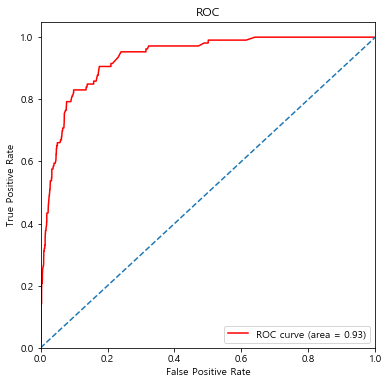

In [66]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")